<a href="https://colab.research.google.com/github/bahmanravaei/tutorial-for-ML/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and main concepts of Neural Networks

A neural network is a set of neuron nodes that are interconnected to each other. The neurons are not just connected to their adjacent neurons but also to the ones that are farther away.

The main idea of neural networks is that every neuron has some input values, and it produces output values by applying some mathematical functions to the input. The outputs of a neuron in one layer become the inputs for neurons in the next layer.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/Components_of_neuron.jpg"> <br/>Structure of neuron cells<br/>

<img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png"><br/>Input and output value of a neuron cell<br/>

<img src="https://python-course.eu/images/machine-learning/neuron_biology_abstraction.webp"><br/>A simple representation of a neuron cell<br/>

<img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg"><br/>A simple neural network <br/>








Feature engineering is a boring task and need lot of experience and some kind trial and error.

Deep learning is a technique in which the neural network figures out by itself which features are important instead of applying feature engineering techniques. In other words, with deep learning, the feature engineering process can be bypassed . <br />

The hidden layer of the neural network can learn feature and extract the most important ones. Furthermore, it helps Machine learning scientist in burden of
dealing with feature engineering in complex datasets. 
 
For example, how would you extract the data to predict the mood of a person given a picture of her face? With neural networks, you don't need to worry about it because the networks can learn the features by themselves.

##Neural Networks: Main Concepts

The main building blocks of neural networks are included Vectors, layers, and linear regression. The data is stored as vectors, and with Python we store these vectors in a form of array. Each layer processes and transforms the data that comes from the previous layer. we can imagine each layer of a network as a feature engineering step, because each layer extracts a representation of the data that came from previous layer.

### The Process to Train a Neural Network

We start with some random weights and bias vectors, make a prediction, compare it to the desired output, and adjust the vectors to predict more accurately the next time. This process continues until the difference between the prediction and the correct targets is minimal.

## Train The First Neural Network

In the process of training a neural network, the first step is assess the error and then adjust the weights between layers accordingly. To adjust the weights, we applied the gradient descent and backpropagation algorithms. Gradient descent is performed to figure out the direction and the rate to update the parameters.

In [1]:
class NeuralNetwork:
    
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

Text(0, 0.5, 'Error for all training instances')

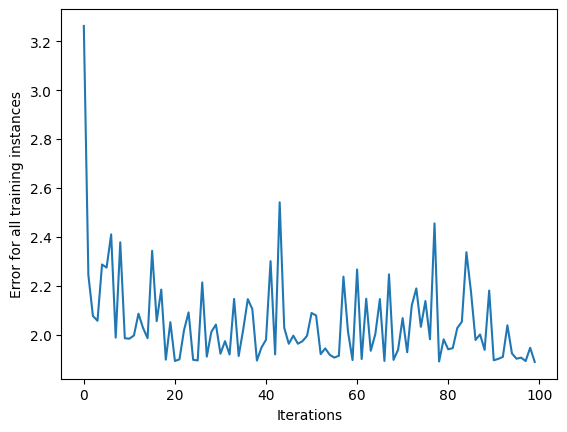

In [2]:
import numpy as np
import matplotlib.pyplot as plt
input_vectors = np.array([[3, 1.5],[2, 1],[4, 1.5],[3, 4],[3.5, 0.5],[2, 0.5],[5.5, 1],[1, 1],])
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
#plt.savefig("cumulative_error.png")

# Perceptron class in sklearn

A perceptron can be imagined as a neuron cell in a live organism.

<img src="https://python-course.eu/images/machine-learning/perceptron_two_inputs_and_bias_400w.webp"> 

<br>



## create dataset

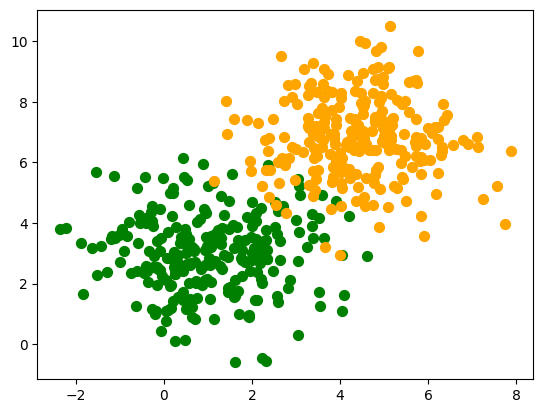

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 500
data, labels = make_blobs(n_samples=n_samples, 
                             centers=([1.1, 3], [4.5, 6.9]), 
                             cluster_std=1.3,
                             random_state=0)


colours = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

## Split dataset

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, 
                            labels,
                            test_size=0.2)

## Create model and fit it

In [5]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(train_data, train_labels)

Perceptron(random_state=42)

## Evaluate the Score

In [6]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.9675
score on test data:  0.95


## Classification of non-binary problems

### create dataset

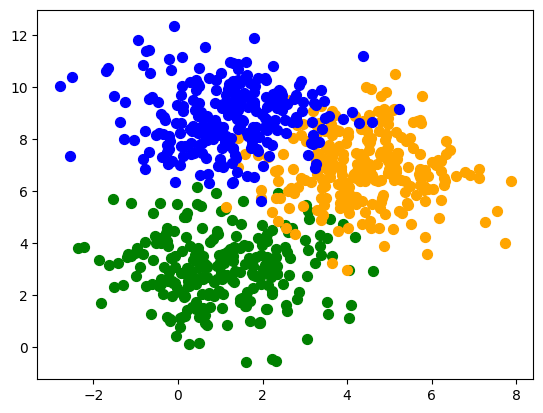

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 750
data, labels = make_blobs(n_samples=n_samples, 
                             centers=([1.1, 3], [4.5, 6.9], [1.1, 8.9]), 
                             cluster_std=1.3,
                             random_state=0)


colours = ('green', 'orange','blue')
fig, ax = plt.subplots()

for n_class in range(3):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

### one vs all strategy

The Perceptron classifier can only be applied on binary classification problems, but this dataset consists fo three different classes.

Solution: 
there are several approaches to solve this issue, one of the most common is called the One vs All strategy. The one vs all strategy consists on selecting one target and merging the rest.

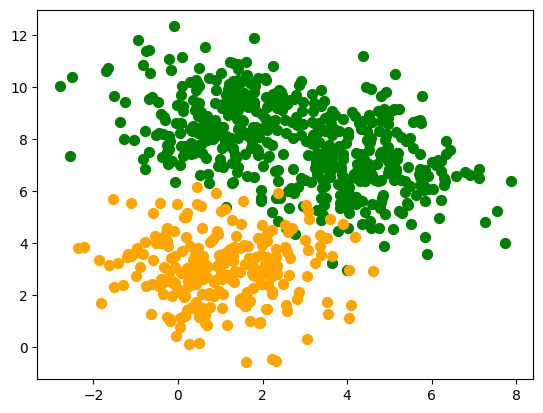

In [8]:
labels = (labels==0)

colours = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))


In [9]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, 
                            labels,
                            test_size=0.2)


p = Perceptron(random_state=42)
p.fit(train_data, train_labels)



predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.9733333333333334
score on test data:  0.9866666666666667


### Classifying the Iris Data with Perceptron Classifier and one vs all strategy

In [10]:
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report


iris = load_iris()

targets = (iris.target==0).astype(np.int8)

train_data, test_data, train_labels, test_labels = train_test_split(iris.data, 
                            targets,
                            test_size=0.2)

p = Perceptron(random_state=42,
               max_iter=10,
               tol=0.001)
p.fit(train_data, train_labels)

#sample = random.sample(range(len(train_data)), 10)
print(classification_report(p.predict(train_data), train_labels))
print(classification_report(p.predict(test_data), test_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Neural Networks in Python

deep learning frameworks: 
1.   sklearn.neural_network
2.   TensorFlow
3.   PyTorch

In this tutorial we just focus on sklearn.neural_network and TensorFlow and pyTorch will be studied in another tutorial.



# Neural Networks with Scikit

### MLPClassifier classifier
multilayer perceptron (MLP)

#### Multilabel Example

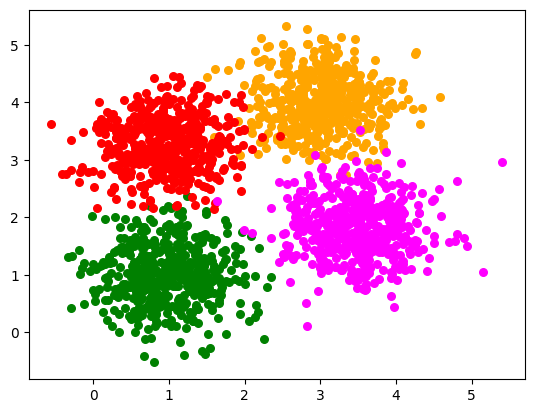

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 2000
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "red", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


train_data, test_data, train_labels, test_labels = train_test_split(data, 
                            labels,
                            test_size=0.2)


clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1,
                    max_iter=500)

clf.fit(train_data, train_labels) 

clf.score(train_data, train_labels)

0.988125

Here, we created a MLPClassifier, But a few notes on the parameters:

1) hidden_layer_sizes: tuple of shape(n_layers - 2,), default=(100,)
The ith element represents the number of neurons in the ith hidden layer.
(6,) means one hidden layer with 6 neurons

2) solver:
The weight optimization can be influenced with the solver parameter. Three solver modes are available: 


* 'lbfgs' : 
is an optimizer in the family of quasi-Newton methods.

* 'sgd' : 
refers to stochastic gradient descent.

* 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba


The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

Without understanding in the details of the solvers, you should know the following: 'adam' works pretty well - both training time and validation score - on relatively large datasets, i.e. thousands of training samples or more. For small datasets, however, 'lbfgs' can converge faster and perform better.


3) 'alpha': 
Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

This parameter can be used to control possible 'overfitting' and 'underfitting'.


4) max_iterint, default=200: 
Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

For more information about MLPClassifier click <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html"> here </a>

In [13]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.988125
score on test data:  0.98


### Multi-layer Perceptron

Look at the following code:

In [14]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y)) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


The following diagram depicts the neural network, that we have trained for the classifier clf in above cell. As the diagram shows, there are two input nodes $X_0$ and $X_1$, called the *input layer*, and one output neuron 'Out'. There are two hidden layers the first one with the neurons $H_{00}$ ... $H_{04}$ and the second hidden layer consisting of $H_{10}$ and $H_{11}$. Each neuron of the hidden layers and the output neuron possesses a corresponding Bias, i.e. $B_{00}$ is the corresponding Bias to the neuron $H_{00}$, $B_{01}$ is the corresponding Bias to the neuron $H_{01}$ and so on.

Each neuron of the hidden layers receives the output from every neuron of the previous layers and transforms these values with a weighted linear summation into an output value, where n is the number of neurons of the layer and $w_i$ corresponds to the ith component of the weight vector.

$$\sum_{i=0}^{n-1}w_ix_i = w_0x_0 + w_1x_1 + ... + w_{n-1}x_{n-1}$$ 

The output layer receives the values from the last hidden layer. It also performs a linear summation, but a non-linear activation function like the sigmoid function will be applied to the summation result.

$$g(\cdot):R \rightarrow R$$ 

<img src="https://python-course.eu/images/machine-learning/mlp_example_layer_600w.webp">

In [15]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


The values for $w_0$  and $w_1$ can be accessed from *clf.coefs_*:

In [16]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])

w0 =  -0.14203691267827168
w1 =  -0.6978111149778693


The weight vector of $H_{00}$ can be accessed with

In [17]:
clf.coefs_[0][:,0]

array([-0.14203691, -0.69781111])

We can generalize the above to access a neuron $H_{ij}$
 in the following way:

In [18]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [19]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


In [20]:
result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])
print(result)

[0 0 0 0 1 1 1 1]


In [21]:
prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


### Apply the MLPClassifier on Iris Dataset

The Iris dataset consists of three classes, which included 'setosa', 'versicolor', and 'virginica'. 

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



iris = load_iris()


train_data, test_data, train_labels, test_labels = train_test_split(iris.data, iris.target,
                            test_size=0.2)

# scaling the data
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)



# Training the Model
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)



predictions_train = mlp.predict(train_data)
print("train data accuracy")
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print("test data accuracy")
print(accuracy_score(predictions_test, test_labels))



print("confusion matrix train data")
print(confusion_matrix(predictions_train, train_labels))

print("confusion matrix test data")
print(confusion_matrix(predictions_test, test_labels))

print("confusion matrix classification report")
print(classification_report(predictions_test, test_labels))

train data accuracy
0.9833333333333333
test data accuracy
0.9
confusion matrix train data
[[39  0  0]
 [ 0 40  1]
 [ 0  1 39]]
confusion matrix test data
[[11  0  0]
 [ 0  7  1]
 [ 0  2  9]]
confusion matrix classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      0.88      0.82         8
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



### MNIST Dataset


#### Load dataset

In [23]:
from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', as_frame=False, cache=False)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [24]:
X /= 255.0
train_imgs, test_imgs, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=42)

#### Define model and train it

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    max_iter=480, alpha=1e-4,
                    solver='sgd', verbose=10, 
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1)



#train_labels = train_labels.reshape(train_labels.shape[0],)
#print(train_imgs.shape, train_labels.shape)

mlp.fit(train_imgs, train_labels)
print("Training set score: %f" % mlp.score(train_imgs, train_labels))
print("Test set score: %f" % mlp.score(test_imgs, test_labels))

Iteration 1, loss = 0.31112030
Iteration 2, loss = 0.12844792
Iteration 3, loss = 0.09124234
Iteration 4, loss = 0.07110478
Iteration 5, loss = 0.05833319
Iteration 6, loss = 0.04806162
Iteration 7, loss = 0.04031445
Iteration 8, loss = 0.03425968
Iteration 9, loss = 0.02798971
Iteration 10, loss = 0.02424487
Iteration 11, loss = 0.02112661
Iteration 12, loss = 0.01710484
Iteration 13, loss = 0.01470056
Iteration 14, loss = 0.01211818
Iteration 15, loss = 0.01005108
Iteration 16, loss = 0.00854888
Iteration 17, loss = 0.00705081
Iteration 18, loss = 0.00628606
Iteration 19, loss = 0.00519937
Iteration 20, loss = 0.00473578
Iteration 21, loss = 0.00388126
Iteration 22, loss = 0.00346310
Iteration 23, loss = 0.00321669
Iteration 24, loss = 0.00286692
Iteration 25, loss = 0.00260242
Iteration 26, loss = 0.00243353
Iteration 27, loss = 0.00232340
Iteration 28, loss = 0.00210123
Iteration 29, loss = 0.00199093
Iteration 30, loss = 0.00191368
Iteration 31, loss = 0.00182377
Iteration 32, los

#### Show coefs_

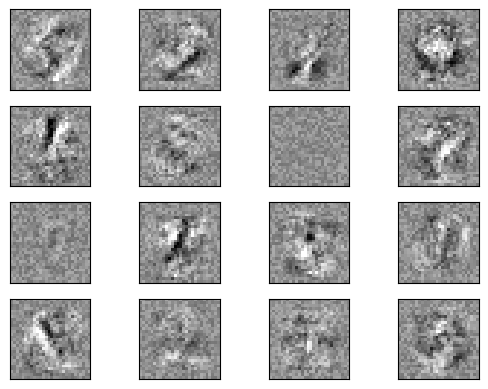

In [26]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

https://github.com/greydanus/mnist1d

### The Parameter alpha

Varying regularization in Multi-layer Perceptron: 


A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.

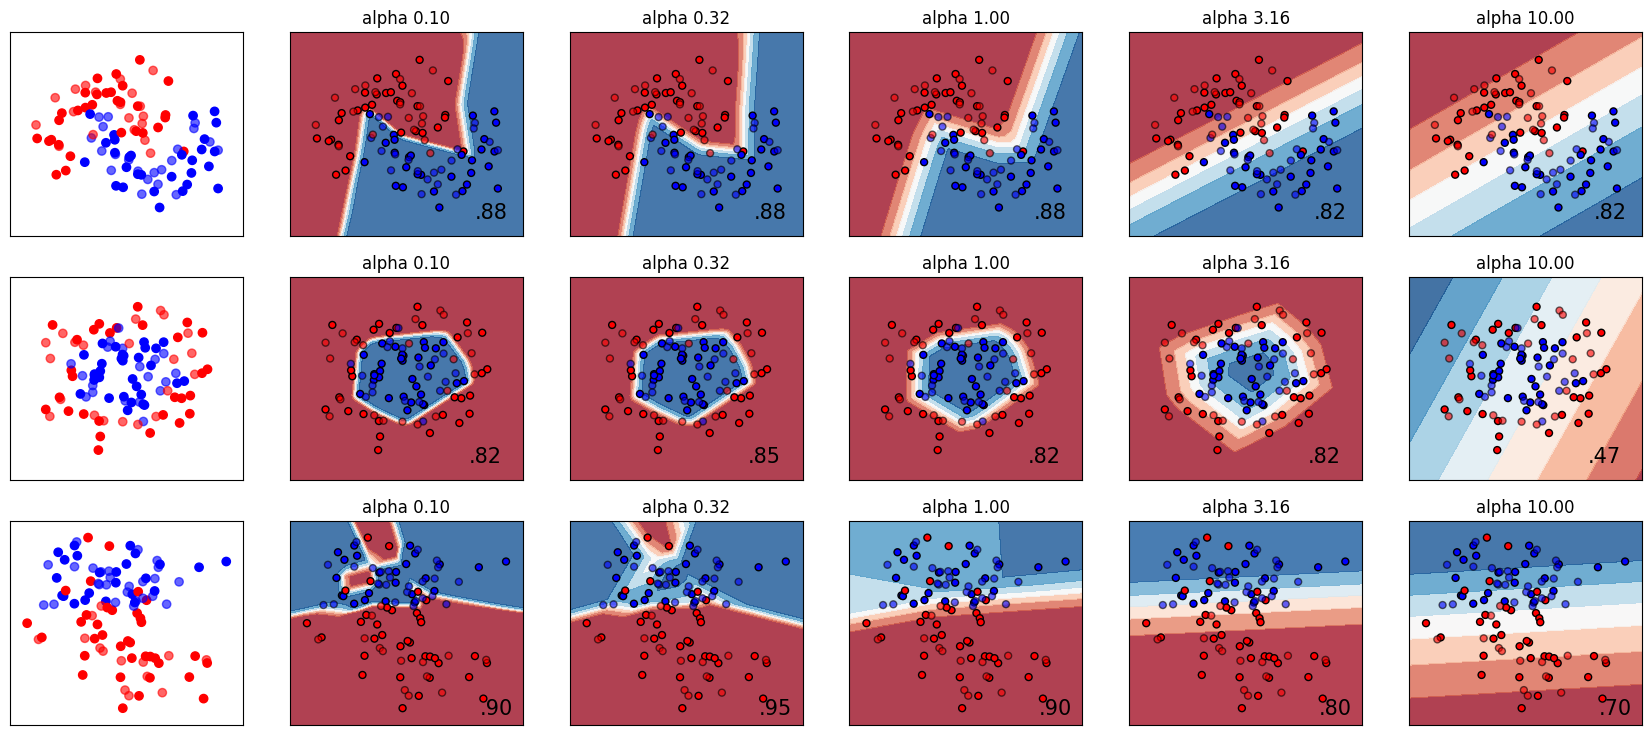

In [27]:
# code from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

###A Neural Network for the Digits Dataset


#### Load digits dataset

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()


#### Show the 100 first images

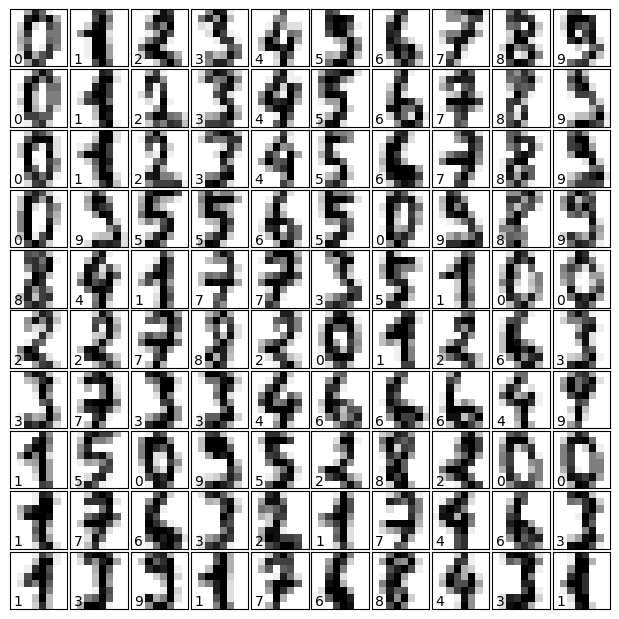

In [29]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))



#### Train the model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


res = train_test_split(digits.data, digits.target, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 


mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True)


mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663583
Iteration 7, loss = 0.95476869
Iteration 8, loss = 0.98840135
Iteration 9, loss = 0.85124323
Iteration 10, loss = 0.75499271
Iteration 11, loss = 0.80608405
Iteration 12, loss = 0.72358116
Iteration 13, loss = 0.68370817
Iteration 14, loss = 0.78455371
Iteration 15, loss = 0.71477343
Iteration 16, loss = 0.66806356
Iteration 17, loss = 0.81050074
Iteration 18, loss = 0.68337671
Iteration 19, loss = 0.74931776
Iteration 20, loss = 0.66185255
Iteration 21, loss = 0.77614665
Iteration 22, loss = 0.69448062
Iteration 23, loss = 0.70176765
Iteration 24, loss = 0.76440970
Iteration 25, loss = 0.70033401
Iteration 26, loss = 0.65138383
Iteration 27, loss = 0.59872788
Iteration 28, loss = 0.57207818
Iteration 29, loss = 0.62176226
Iteration 30, loss = 0.58669984
Iteration 31, loss = 0.54031128
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

#### Evaluate the model

In [31]:
from sklearn.metrics import accuracy_score
predictions = mlp.predict(test_data)

accuracy_score(test_labels, predictions)

0.8194444444444444

5 0.8194444444444444
6 0.8777777777777778
7 0.8777777777777778
8 0.8444444444444444
9 0.8722222222222222
10 0.9083333333333333
11 0.9194444444444444
12 0.9416666666666667
13 0.9611111111111111
14 0.9666666666666667
15 0.9305555555555556
16 0.9611111111111111
17 0.8111111111111111
18 0.9527777777777777
19 0.9361111111111111
20 0.9694444444444444
21 0.9638888888888889
22 0.9388888888888889
23 0.9555555555555556
24 0.9694444444444444
25 0.9611111111111111
26 0.975
27 0.9694444444444444
28 0.9555555555555556
29 0.9611111111111111
30 0.9694444444444444
31 0.9694444444444444
32 0.975
33 0.9694444444444444
34 0.9666666666666667


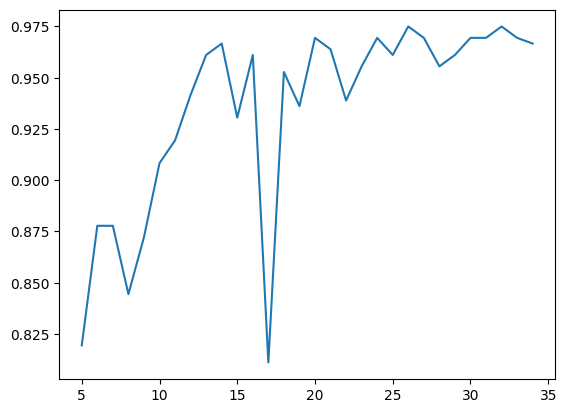

In [32]:
ax_x=[]
ax_y=[]
for i in range(5, 35):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), 
                        activation='logistic', 
                        random_state=1,
                        alpha=1e-4,
                        max_iter=10000,
                        solver='sgd', 
                        tol=1e-4,
                        learning_rate_init=.3, 
                        verbose=False)
    mlp.fit(train_data, train_labels)
    predictions = mlp.predict(test_data)
    acc_score = accuracy_score(test_labels, predictions)
    ax_x.append(i)
    ax_y.append(acc_score)
    print(i, acc_score)

plt.plot(ax_x,ax_y)

https://python-course.eu/machine-learning/neural-networks-with-scikit.php